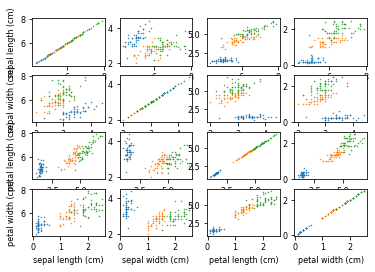

In [32]:
import sys
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import sklearn.decomposition as decomposition


DEBUGGING = True


###### MAIN ######

#-load iris data set
iris = datasets.load_iris()
X = iris.data
y = iris.target
M = X.shape[0] # number of instances in the data set
N = X.shape[1] # number of features in the data set

the_classes = np.unique( y )
num_classes = len( the_classes )

colour_cycle = plt.rcParams['axes.prop_cycle']

plotnum = 1
for row in range( N ):
    for col in range( N ):
        plt.subplot( N, N, plotnum )
        for myclass, mycolour in zip( range( num_classes ), colour_cycle ):
            data = X[y==myclass]
            plt.scatter( data[:,row], data[:,col], s=1, marker='.', c=mycolour['color'] )
            if ( col==0 ):
                plt.ylabel( iris.feature_names[row], fontsize=8 )
            if ( row==N-1 ):
                plt.xlabel( iris.feature_names[col], fontsize=8 )
            plt.tick_params( axis='both', labelsize=8 )
        plotnum += 1

plt.show()


# PCA Iris

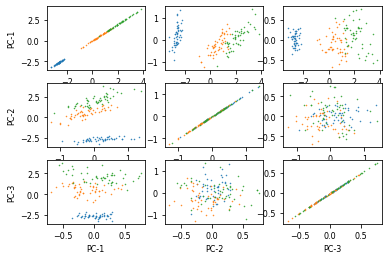

In [36]:
import sklearn.decomposition as decomposition
pca = decomposition.PCA( n_components=N-1 )
pca.fit(X)
#-apply dimensionality reduction to X
pca_X = pca.transform( X )
pca_N = pca_X.shape[1]
plotnum = 1
for row in range( pca_N ):
    for col in range( pca_N ):
        plt.subplot( pca_N, pca_N, plotnum )
        for myclass, mycolour in zip( range( num_classes ), colour_cycle ):
            data = pca_X[y==myclass]
            plt.scatter( data[:,row], data[:,col], s=1, marker='.', c=mycolour['color'] )
            if ( col==0 ):
                plt.ylabel( 'PC-%d' % (row+1), fontsize=8 )
            if ( row==pca_N-1 ):
                plt.xlabel( 'PC-%d' % (col+1), fontsize=8 )
            plt.tick_params( axis='both', labelsize=8 )
        plotnum += 1
# plt.savefig( '../plots/iris-pca-scatter-matrix.png' )
plt.show()

## Classify

In [17]:
import sys
import csv
import pandas as pd
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition as decomposition
import sklearn.model_selection as model_select
import sklearn.tree as tree
import sklearn.metrics as metrics

clf = tree.DecisionTreeClassifier( random_state = 0 )
X_train, X_test, y_train, y_test = model_select.train_test_split( X, y, random_state=0 )
M_train = len( X_train )
M_test = len( X_test )

# fit the tree model to the training data
clf.fit( X_train, y_train )

# predict the labels for the training and test sets
y_hat = clf.predict( X_train )
print('training accuracy = ', metrics.accuracy_score( y_train, y_hat ))
y_hat = clf.predict( X_test )
print('training accuracy = ', metrics.accuracy_score( y_test, y_hat ))


clf = tree.DecisionTreeClassifier( random_state = 0 )
X_train, X_test, y_train, y_test = model_select.train_test_split( pca_X, y, random_state=0 )
M_train = len( X_train )
M_test = len( X_test )

# fit the tree model to the training data
clf.fit( X_train, y_train )

# predict the labels for the training and test sets
y_hat = clf.predict( X_train )
print('training accuracy = ', metrics.accuracy_score( y_train, y_hat ))
y_hat = clf.predict( X_test )
print('training accuracy = ', metrics.accuracy_score( y_test, y_hat ))

training accuracy =  1.0
training accuracy =  0.9736842105263158
training accuracy =  1.0
training accuracy =  0.9210526315789473


# PCA to external data sets

## diabetes

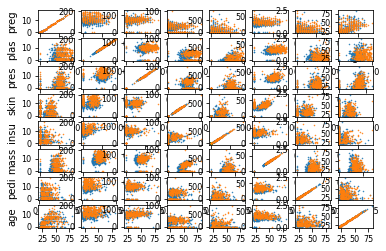

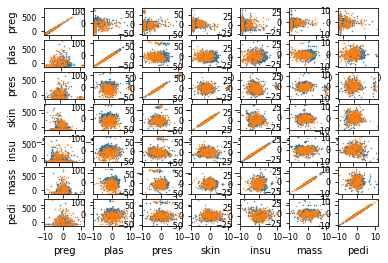

training accuracy =  1.0
training accuracy =  0.71875
training accuracy =  1.0
training accuracy =  0.7395833333333334


In [41]:
import sys
import csv
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt 
import sklearn.decomposition as decomposition

import sklearn.model_selection as model_select
import sklearn.tree as tree
import sklearn.metrics as metrics

DEBUGGING = False
DATA_DIR = '../data/'
DATA_FILE = 'diabetes.csv'

try:
    df = pd.read_csv(DATA_DIR+DATA_FILE,na_filter= False)
except IOError as iox:
    sys.exit()
    
M = len(df.values)
N = len(df.columns)

X = np.zeros((M,N-1),dtype = 'float')
y = np.zeros(M, dtype = 'int')
class_dic = {'tested_negative':0, 'tested_positive':1}
feature_name_dict = { 'preg':0, 'plas':1, 'pres':2, 'skin':3, 'insu':4, 'mass':5, 'pedi':6, 'age':7 }
for i in range(M):
    for j in range (N):
        if(df.columns[j] == 'class'):
            y[i] = class_dic[df['class'].values[i]]
        else:
            X[i][j] = df.values[i][j]
N -= 1 # remove 'class' from number of attributes
if ( DEBUGGING ):
    print('shape of target=', np.shape( y ))
    print('shape of attributes=', np.shape( X ))
    for i in range( N ):
        print(list(feature_name_dict.keys())[i], np.mean( X[i] ))
        

the_classes = np.unique( y )
num_classes = len( the_classes )

colour_cycle = plt.rcParams['axes.prop_cycle']

plotnum = 1
for row in range(N):
    for col in range(N):
        plt.subplot(N,N,plotnum)
        for myclass ,mycolour in zip(range(num_classes),colour_cycle):
            data = X[y == myclass]
            plt.scatter(data[:,row],data[:,col],s= 1, marker = '.',c = mycolour['color'])
            if(col  == 0):
                plt.ylabel(list(feature_name_dict.keys())[row])
            if(row  == 0):
                plt.xlabel(list(feature_name_dict.keys())[col])
            plt.tick_params( axis='both', labelsize=8 )
        plotnum += 1
plt.show()

pca = decomposition.PCA(n_components= N-1)
pca.fit(X)
pca_X = pca.transform(X)
pca_N = pca_X.shape[1]

pnum = 1
for row in range(pca_N):
    for col in range(pca_N):
        plt.subplot(pca_N,pca_N,pnum)
        for myclass ,mycolor in zip(range(num_classes),colour_cycle):
            data = pca_X[ y == myclass]
            plt.scatter(data[:,row],data[:,col],s = 1,marker = '.',c = mycolor['color'])
            if(row == pca_N -1):
                plt.xlabel(list(feature_name_dict.keys())[col])
            if(col == 0):
                plt.ylabel(list(feature_name_dict.keys())[row])
            plt.tick_params( axis='both', labelsize=8 )
        pnum += 1
plt.show()

clf = tree.DecisionTreeClassifier(random_state= 0)
X_train,X_test,y_train,y_test = model_select.train_test_split(X,y,random_state= 0 )
M_train = len(X_train)
M_test = len(X_test)
clf.fit(X_train,y_train)
y_hat = clf.predict(X_train)
print('training accuracy = ', metrics.accuracy_score( y_train, y_hat ))
y_hat = clf.predict( X_test )
print('training accuracy = ', metrics.accuracy_score( y_test, y_hat ))

clf = tree.DecisionTreeClassifier(random_state= 0)
X_train,X_test,y_train,y_test = model_select.train_test_split(pca_X,y,random_state= 0 )
M_train = len(X_train)
M_test = len(X_test)
clf.fit(X_train,y_train)
y_hat = clf.predict(X_train)
print('training accuracy = ', metrics.accuracy_score( y_train, y_hat ))
y_hat = clf.predict( X_test )
print('training accuracy = ', metrics.accuracy_score( y_test, y_hat ))

## contact-lenses

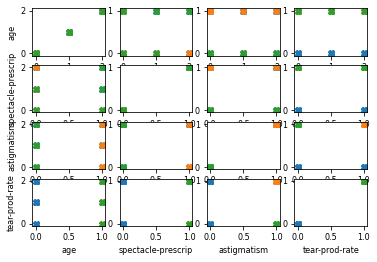

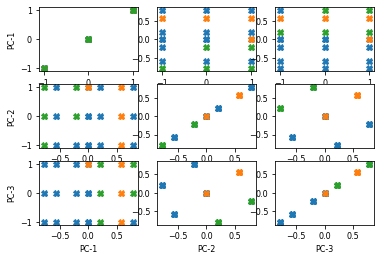

In [50]:
import sys
import csv
import pandas as pd
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition as decomposition

DEBUGGING = True
DATA_DIR  = '../data/'
DATA_FILE = 'contact-lenses.csv'

try:
    df = pd.read_csv(DATA_DIR +DATA_FILE,na_filter=False)
except IOError as iox:
    sys.exit()
M = len(df.values)
N = len(df.columns)

#-get target (class or label) and attribute values and list of feature names
# note that we have to convert class values (labels) to an integer (index)
y = np.zeros( M, dtype='int' )
X = np.zeros(( M, N-1 ), dtype='int' )
feature_name_dict = { 'age':0, 'spectacle-prescrip':1, 'astigmatism':2, 'tear-prod-rate':3 }
# define indexes for nominal attribute values
age_dict = { 'young':0, 'pre-presbyopic':1, 'presbyopic':2 }
scrip_dict = { 'myope':0, 'hypermetrope':1 }
astig_dict = { 'no':0, 'yes':1 }
tear_dict = { 'reduced':0, 'normal':1 }
# define indexes for class values (labels)
class_dict = { 'none':0, 'hard':1, 'soft':2 }
for i in range( N ):
    if ( df.columns[i] == 'class' ):
        for j in range( M ):
            y[j] = class_dict[ df['class'][j] ]
    elif ( df.columns[i] == 'age' ):
        for j in range( M ):
            X[j][ feature_name_dict[ df.columns[i] ] ] = age_dict[ df[ df.columns[i] ][j] ]
    elif ( df.columns[i] == 'spectacle-prescrip' ):
                            
        for j in range( M ):
            X[j][ feature_name_dict[ df.columns[i] ] ] = scrip_dict[ df[ df.columns[i] ][j] ]
    elif ( df.columns[i] == 'astigmatism' ):
        for j in range( M ):
            X[j][ feature_name_dict[ df.columns[i] ] ] = astig_dict[ df[ df.columns[i] ][j] ]
    elif ( df.columns[i] == 'tear-prod-rate' ):
        for j in range( M ):
            X[j][ feature_name_dict[ df.columns[i] ] ] = tear_dict[ df[ df.columns[i] ][j] ]
    else:
        print('error!'+df.columns[i])
        
N-=1
the_classes = np.unique(y)
num_classes = len(the_classes)
colour_cycle = plt.rcParams['axes.prop_cycle']

#-generate a scatter plot matrix of pairwise feature comparisons
plotnum = 1
for row in range( N ):
    for col in range( N ):
        plt.subplot( N, N, plotnum )
        for myclass, mycolour in zip( range( num_classes ), colour_cycle ):
            data = X[y==myclass]
            plt.plot( data[:,row], data[:,col], marker='X', c=mycolour['color'], linestyle='None' )
            if ( col==0 ):
                plt.ylabel( list(feature_name_dict.keys())[row], fontsize=8 )
            if ( row==N-1 ):
                plt.xlabel( list(feature_name_dict.keys())[col], fontsize=8 )
            plt.tick_params(axis = 'both',labelsize = 8)
        plotnum += 1

plt.show()

pca = decomposition.PCA(n_components = N-1)
pca.fit(X)
pca_X = pca.transform(X)
# pca_N = len(pca_X[0])
pca_N = pca_X.shape[1]

plotnum = 1
for row in range( pca_N ):
    for col in range( pca_N ):
        plt.subplot( pca_N, pca_N, plotnum )
        for myclass, mycolour in zip( range( num_classes ), colour_cycle ):
            data = pca_X[y==myclass]
            plt.plot( data[:,row], data[:,col], marker='X', c=mycolour['color'], linestyle='None' )
            if ( col==0 ):
                plt.ylabel( 'PC-%d' % (row+1), fontsize=8 )
            if ( row==pca_N-1 ):
                plt.xlabel( 'PC-%d' % (col+1), fontsize=8 )
            plt.tick_params( axis='both', labelsize=8 )
        plotnum += 1

plt.show()




In [65]:
import sklearn.model_selection as model_select
import sklearn.tree as tree
import sklearn.metrics as metrics

clf = tree.DecisionTreeClassifier(random_state= 0)
X_train,X_test,y_train,y_test = model_select.train_test_split(X,y,random_state= 0 )
M_train = len(X_train)
M_test = len(X_test)
clf.fit(X_train,y_train)
# predict the labels for the training and test sets
y_hat = clf.predict( X_train )
print('training accuracy = ', metrics.accuracy_score( y_train, y_hat ))
y_hat = clf.predict( X_test )
print('training accuracy = ', metrics.accuracy_score( y_test, y_hat ))


clf = tree.DecisionTreeClassifier(random_state= 0)
X_train,X_test,y_train,y_test = model_select.train_test_split(pca_X,y,random_state= 0 )
M_train = len(X_train)
M_test = len(X_test)
clf.fit(X_train,y_train)
# predict the labels for the training and test sets
y_hat = clf.predict( X_train )
print('training accuracy = ', metrics.accuracy_score( y_train, y_hat ))
y_hat = clf.predict( X_test )
print('training accuracy = ', metrics.accuracy_score( y_test, y_hat ))

training accuracy =  1.0
training accuracy =  1.0
training accuracy =  0.9444444444444444
training accuracy =  1.0


## weather

INPUT FILE = ../data/weather.csv
number of attributes = 5
number of instances = 14
0 - outlook (object)
1 - temperature (int64)
2 - humidity (int64)
3 - windy (bool)
4 - class (object)
0 outlook
1 temperature
2 humidity
3 windy
4 class


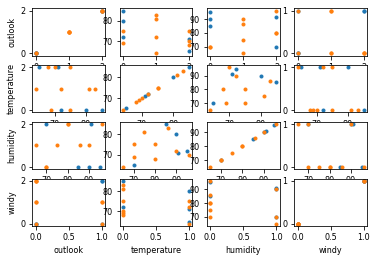

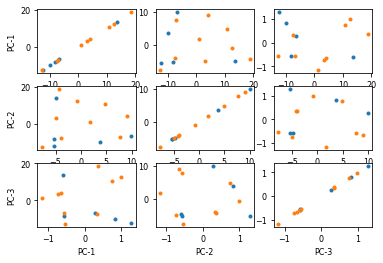

In [95]:
import sys
import csv
import pandas as pd
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import sklearn.decomposition as decomposition

DEBUGGING = True
DATA_DIR  = '../data/'
DATA_FILE = 'weather.csv'

try:
    df = pd.read_csv( DATA_DIR + DATA_FILE, na_filter=False )
except IOError as iox:
    print('there was an I/O error trying to open the data file: ' + str( iox ))
    sys.exit()
#-get and size of raw data set
N = len( df.columns )
M = len( df.values )

#-print columns
if DEBUGGING:
    print('INPUT FILE = ' + DATA_DIR + DATA_FILE)
    print('number of attributes = ' + str( N ))
    print('number of instances = ' + str( M ))
    for ( i, c, t ) in zip( range( N ), df.columns, df.dtypes ):
        print('{} - {} ({})'.format( i, c, t ))

#-get target (class or label) and attribute values and list of feature names
# note that we have to convert class values (labels) to an integer (index)
y = np.zeros( M )
X = np.zeros(( M, N-1 ), dtype='float' )
feature_name_dict = { 'outlook':0, 'temperature':1, 'humidity':2, 'windy':3 }
xi = 0
# define indexes for nominal attribute values
outlook_dict = { 'sunny':0, 'overcast':1, 'rainy':2 }
# define indexes for class values (labels)
class_dict = { 'no':0, 'yes':1 }
for i in range( N ):
    print(i, df.columns[i])
    if ( df.columns[i] == 'class' ):
        for j in range( M ):
            y[j] = class_dict[ df['class'][j] ]
    elif ( df.columns[i] == 'outlook' ):
        for j in range( M ):
            X[j][ feature_name_dict[ df.columns[i] ] ] = outlook_dict[ df[ df.columns[i] ][j] ]
    elif ( df.columns[i] == 'windy' ):
        for j in range( M ):
            if ( df[ df.columns[i] ][j] ):
                X[j][ feature_name_dict[ df.columns[i] ] ] = 1
            else:
                X[j][ feature_name_dict[ df.columns[i] ] ] = 0
    else:
        for j in range( M ):
            X[j][ feature_name_dict[ df.columns[i] ] ] = df[ df.columns[i] ][j]
N -= 1 # remove 'class' from number of attributes

the_classes = np.unique(y)
num_classes = len(the_classes)

colour_cycle = plt.rcParams['axes.prop_cycle']

#-generate a scatter plot matrix of pairwise feature comparisons
plotnum = 1
for row in range( N ):
    for col in range( N ):
        plt.subplot( N, N, plotnum )
        for myclass, mycolour in zip( range( num_classes ), colour_cycle ):
            data = X[y==myclass]
            plt.plot( data[:,row], data[:,col], '.', color=mycolour['color'] )
            if ( col==0 ):
                plt.ylabel( list(feature_name_dict.keys())[row], fontsize=8 )
            if ( row==N-1 ):
                plt.xlabel( list(feature_name_dict.keys())[col], fontsize=8 )
            plt.tick_params( axis='both', labelsize=8 )
        plotnum += 1

plt.show()

pca = decomposition.PCA(n_components= N-1)
pca.fit(X)
pca_X = pca.transform(X)
pca_N = len(pca_X[0])

plotnum = 1
for row in range( pca_N ):
    for col in range( pca_N ):
        plt.subplot( pca_N, pca_N, plotnum )
        for myclass, mycolour in zip( range( num_classes ), colour_cycle ):
            data = pca_X[y==myclass]
            plt.plot( data[:,row], data[:,col], '.', color=mycolour['color'] )
            if ( col==0 ):
                plt.ylabel( 'PC-%d' % (row+1), fontsize=8 )
            if ( row==pca_N-1 ):
                plt.xlabel( 'PC-%d' % (col+1), fontsize=8 )
            plt.tick_params( axis='both', labelsize=8 )
        plotnum += 1

plt.show()

In [97]:
import sklearn.model_selection as model_select
import sklearn.tree as tree
import sklearn.metrics as metrics

clf = tree.DecisionTreeClassifier(random_state= 0)
X_train,X_test,y_train,y_test = model_select.train_test_split(X,y,random_state= 0)

M_train = len(X_train)
M_test = len(X_test)

clf.fit(X_train,y_train)

# predict the labels for the training and test sets
y_hat = clf.predict( X_train )
print('training accuracy = ', metrics.accuracy_score( y_train, y_hat ))
y_hat = clf.predict( X_test )
print('training accuracy = ', metrics.accuracy_score( y_test, y_hat ))

clf = tree.DecisionTreeClassifier(random_state= 0)
X_train,X_test,y_train,y_test = model_select.train_test_split(pca_X,y,random_state= 0)

M_train = len(X_train)
M_test = len(X_test)

clf.fit(X_train,y_train)

# predict the labels for the training and test sets
y_hat = clf.predict( X_train )
print('training accuracy = ', metrics.accuracy_score( y_train, y_hat ))
y_hat = clf.predict( X_test )
print('training accuracy = ', metrics.accuracy_score( y_test, y_hat ))

training accuracy =  1.0
training accuracy =  0.0
training accuracy =  1.0
training accuracy =  0.25
